# Linear regression LassoCV and RidgeCV
Least Absolute Shrinkage and Selection Operator
Lasso Regression uses L1 regularization technique; it automatically performs feature selection.
Also, Lasso apply regularization that is an important strategy to avoid overfitting.

Regularization is implemented by adding a “penalty” term to the best fit derived from the trained data, this restricts the influence of predictor variables over the output variable by compressing their coefficients.

Regularization  reduce the size/dimensions of the coefficients by using different types of regression techniques which uses regularization to overcome this problem.

This is a key difference between lasso and ridge as they use two different Regularization strategy
- lasso = L1 regularization could produce zero value coefficents resulting in an elimination, so it create simpler model
- ridge = L2 regularization couldn't result in any elimination of sparse models or coefficients

# Data analysis
Performing a data analysis through cross validation and also test later on our test_split.
Displaying also the lasso prediction residuals and the coefficent of the top predictors.

Then repeat the process after dropping some minor features and see if the R2 score get better.

cross validation lasso score: 0.8462636093540267
Lasso Score on our test dataset 0.9019814318653677
cross validation ridge score: 0.8349766552023794
Ridge score on our test dataset 0.8998288516807833


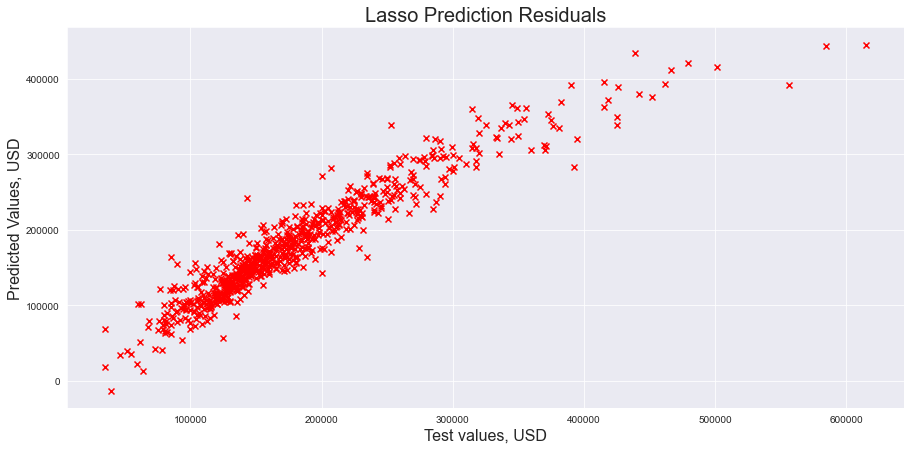

,Coefficient
Gr_Liv_Area,16861.948281
Total_SF,12962.832471
Overall_Qual,12469.017400
Neighborhood_b'Northridge_Heights',9257.848726
All_Quality,8645.127086
Neighborhood_b'Northridge',5490.216663
Neighborhood_b'Stone_Brook',5183.415646
Neighborhood_Score,4816.355189
Kitchen_Qual,4532.278751
Bldg_Type_b'OneFam',4228.859720


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import  LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

lasso = LassoCV()
ridge = RidgeCV()

print('cross validation lasso score:', cross_val_score(lasso, X_train, y_train, cv=5).mean())
lasso.fit(X_train,y_train)
print("Lasso Score on our test dataset",lasso.score(X_test,y_test))
print('cross validation ridge score:', cross_val_score(ridge, X_train, y_train, cv=5).mean())
ridge.fit(X_train,y_train)
print("Ridge score on our test dataset",ridge.score(X_test,y_test))
lasso_predictions = lasso.predict(X_test)

plt.figure(figsize=(15,7))
plt.scatter(y_test, lasso_predictions, color='r',marker='x')
plt.title('Lasso Prediction Residuals', fontsize=20)
plt.xlabel('Test values, USD', fontsize=16)
plt.ylabel('Predicted Values, USD', fontsize=16)
plt.show()

df_coefs = pd.DataFrame(lasso.coef_, index=X_train.columns, columns = ['Coefficient'])
coef_mask = df_coefs[df_coefs['Coefficient'] != 0]
coef_mask.abs().sort_values('Coefficient', ascending=False)[:11]



Note that the model performs better on homes that fall into the median price range, with some outliers on the lower and higher range of prices.
This is most likely due to sparse representation of homes in those ranges.

# Dropping components of custom features

Results on dataset without minor features
cross validation lasso score: 0.8302922816125584
Lasso Score on our test dataset 0.8913747741433156
cross validation ridge score: 0.8174576119082169
Ridge score on our test dataset 0.8894796062725208


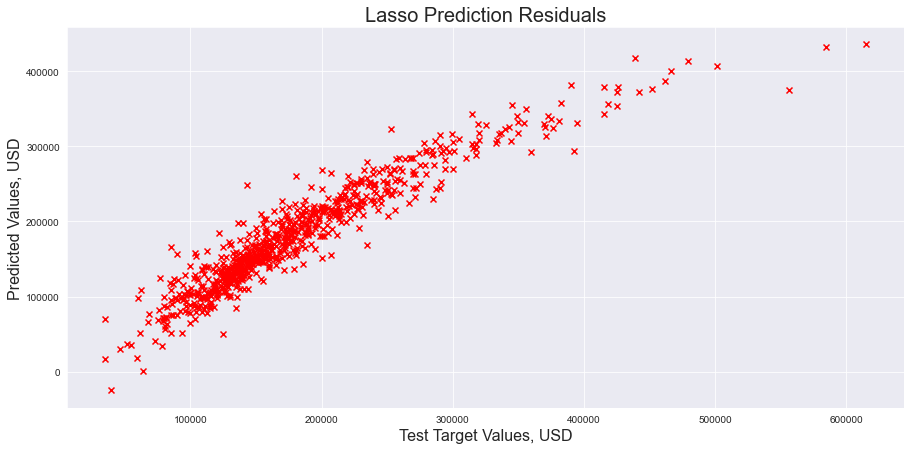

,Coefficient
Total_SF,16874.043362
Gr_Liv_Area,16087.079034
Neighborhood_Score,14224.154277
Overall_Qual,12939.373407
All_Quality,9538.319476
Kitchen_Qual,4927.082844
Mas_Vnr_Area,4461.878233
Misc_Val,3994.841969
Bldg_Type_b'OneFam',3739.364928
Exter_Qual,3060.120378


In [35]:
oh_neighbor = []
for col in X_train.columns:
    if 'Neighborhood_b' in col:
        oh_neighbor.append(col)

X_train_modified = X_train.drop(columns=oh_neighbor)
X_test_modified= X_test.drop(columns=oh_neighbor)

porch = ['Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch']
surface = ['Total_Finished_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Garage_Area']
baths = ['Full_Bath', 'Half_Bath', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']

X_train_modified = X_train_modified.drop(columns=porch)
X_test_modified = X_test_modified.drop(columns=porch)

X_train_modified = X_train_modified.drop(columns=surface)
X_test_modified = X_test_modified.drop(columns=surface)

X_train_modified = X_train_modified.drop(columns=baths)
X_test_modified = X_test_modified.drop(columns=baths)

print("Results on dataset without minor features")
print('cross validation lasso score:', cross_val_score(lasso, X_train_modified, y_train, cv=5).mean())
lasso.fit(X_train_modified,y_train)
print("Lasso Score on our test dataset",lasso.score(X_test_modified,y_test))

print('cross validation ridge score:', cross_val_score(ridge, X_train_modified, y_train, cv=5).mean())
ridge.fit(X_train_modified,y_train)
print("Ridge score on our test dataset",ridge.score(X_test_modified,y_test))
lasso_predictions = lasso.predict(X_test_modified)

plt.figure(figsize=(15,7))
plt.scatter(y_test, lasso_predictions, color='r',marker='x',cmap='viridis',linewidths=1.5)
plt.title('Lasso Prediction Residuals', fontsize=20)
plt.xlabel('Test Target Values, USD', fontsize=16)
plt.ylabel('Predicted Values, USD', fontsize=16)
plt.show()

df_coefs = pd.DataFrame(lasso.coef_, index=X_train_modified.columns, columns = ['Coefficient'])
coef_mask = df_coefs[df_coefs['Coefficient'] != 0]
coef_mask.abs().sort_values('Coefficient', ascending=False)[:11]



The model seems to be quite good since it follows a linear trend, also it is similar to the previous one but the price range from 300000 to 400000 seems to be slightly improved even though the accuracy remains virtually the same.

Note that our custom features are in the top predictors so trying to create new improved features also based on the correlation heatmap we have done seems a good idea.